# Simple Linear Regression - Supervised Model

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')

## Read Dataset

In [2]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


independent variable = feature = estimator = attribute = input

dependent variable   = target  = label     = output

rows = observation, sample

**features** = TV + radio + newspaper

**target** = sales

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe()
#std>mean oluyorsa outlier olma ihtimaline bakıyoruz
#std - mean yakın ise outlier tehlikesivar ona ilişkisine bakıyoruz.
#min ½25 arasında uçurum varsa ya da max ve ½75 arasında uçurum varsa outlier riski var
#eğer bağımsız-bağımlı değişken arasında kuvvetli bağ varsa  anlamlı lineear vardır(features ile target arasında strong relo varsa lineeer reg. vardır)
#eğer 1 tane bağımsıız kullanacaksam 1 bağımlı değişkene bakacaksam en kuvvetli
#bağ olan feture bakacağız doğruluğu en yüksek çıkması için.


,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Create new independent variable (feature)

In [5]:
df["total_spend"] = df["TV"] + df["radio"] + df["newspaper"]

In [6]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [8]:
df = df.iloc[:,[0,1,2,4,3]]
df.head()
#target feature en son column atyıoruz.

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


## Which feature is more suitable for linear regression?

In [9]:
for i in df.drop(columns ="sales"):
    print(f"corr between sales and {i:<12}:  {df.sales.corr(df[i])}")
  # eğer bağımsız-bağımlı değişken arasında kuvvetli bağ varsa  anlamlı lineear vardır

corr between sales and TV          :  0.7822244248616061
corr between sales and radio       :  0.5762225745710551
corr between sales and newspaper   :  0.22829902637616528
corr between sales and total_spend :  0.8677123027017427


<AxesSubplot:>

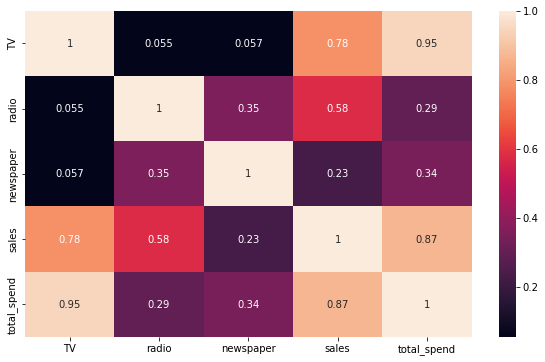

In [10]:
sns.heatmap(df.corr(), annot =True)

## Plotting the relationship between independent variable and dependent variable 

In [11]:
df = df[["total_spend", "sales"]] #simple lineear da tej feeturela ilişki kurmam lazım.
df.head()

,total_spend,sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9


<AxesSubplot:xlabel='total_spend', ylabel='sales'>

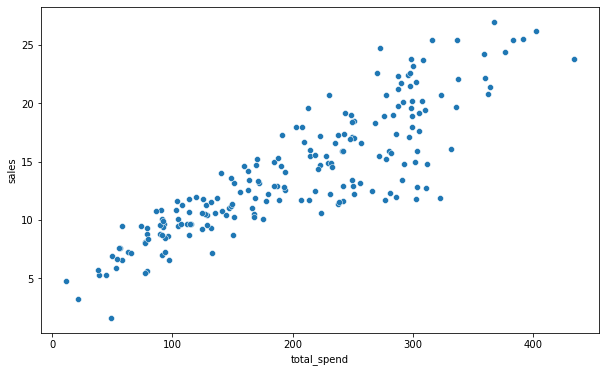

In [12]:
sns.scatterplot(x ="total_spend", y = "sales", data=df)
#positive+strong+linear 3
#weak moderate 0.24-80 strong 0.85 ve üzeri 

In [ ]:
#etki-tepki bağımlıya göre bağımsızı tahmin etmeye çalışıyorum.nasıl değişikliğe uğruyor.
#Regressiona bakacağız feature arası etki-tepkiye bakmak için.
#regression girdiği zaman regression çizgisi giriyor.bu çizgiye göre tahminlerini yapar.best linenı nasıl çizeceğiz,
#öyle bir  çizeceğiz ki bütün datalar için en iyi tahimini yapacak çizgi olması lazım.en doğru şekilde fit etmek önemli
#1.şart anlamlı bir korelasyon varsa data lşinee uygun data demek lineer de uygun s

## Correlation between independent variable and dependent variable

In [13]:
corr = df["sales"].corr(df["total_spend"])
corr

0.8677123027017427

In [15]:
df["total_spend"].corr(df["sales"])

0.8677123027017427

## Coefficient of determination (R2)

In [14]:
#sadece simple lineer da geçerli.tek feature da modeller de kullanılır formül
#bağımsız değişkendeki  bağımlı değişkendeki değişimin ne kadarını açıklayabildiğimi ifade ediyor.
#elimdeki veri target labelini tahmin etmek için ½75 oranında yeterli
#modellerde genelleme istiyoruz gerçek hayatta çok karmaşık veriler.o yüzden genellem değer olmasını istiyoruz.ne kadar bilgiyi sağlayan feature olursa model oı kadar doğru model olur.
#modelin başarılı olup olmadığını anlamak için kullanlıan matrix r*2
R2_score = corr**2
R2_score

0.7529246402599608

A house price ----> 50.000 USD

B house price ----> 60.000 USD


A house ----> 2+1

B house ----> 3+1


If 3,000 USD of the variation in house prices is due to the number of rooms in the houses, what is the Coefficient of determination (R2) of the number of rooms?

### R2_score for the number of rooms in the houses

r2_score = 3000 / (60000-50000)

r2_score = 0.3

## Linear Regression

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

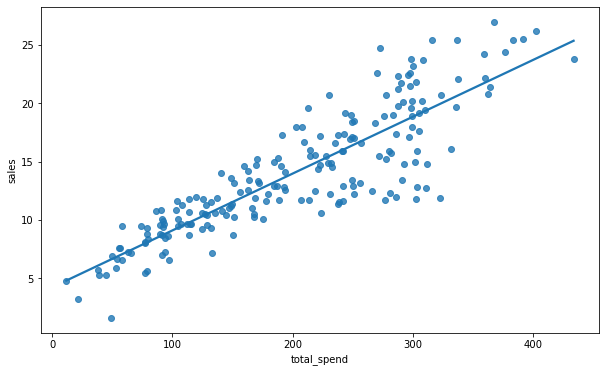

In [16]:
sns.regplot(x="total_spend", y="sales", data=df, ci=None)
#best line da aen az hatayla tahminlerimi yapabileceğim.
#best değerlerin reg. değerleri topladığımızda sıfır 0 olur.

## Splitting the dataset into X(independent variables) and y (dependent variable)

In [18]:
# y_pred = b1X + b0

In [17]:
X= df["total_spend"]
y= df["sales"]

In [18]:
np.polyfit(X, y, deg=1) #içerisine bağ-bağ.sız verdiğinde bize derecesini veriyor.reklam yapmasamda alacağım sales miktarı.taksimetrenin ilk açıldığında alınan ücerti

array([0.04868788, 4.24302822])

In [19]:
slope, intercept = np.polyfit(X, y, deg=1)

In [20]:
print("slope    :", slope)
print("intercept:", intercept) #hangi datayı kullanırsam kullanayım bu değerler gelecektir.

slope    : 0.048687879319048145
intercept: 4.2430282160363255


## Determination of coefficients (slope and intercept)

## Why do we use the least squares error method to find the regression line that best fits the data?

In [21]:
b1, b0 = np.polyfit(X, y, deg=1)

In [22]:
print("b1 :", b1)
print("b0 :", b0)

b1 : 0.048687879319048145
b0 : 4.2430282160363255


In [23]:
y_pred = b1*X + b0   # b2*X2 + b1*X + b0

In [24]:
values = {"actual": y, "predicted": y_pred, "residual":y-y_pred, "LSE": (y-y_pred)**2}
df_2 = pd.DataFrame(values)
df_2

,actual,predicted,residual,LSE
0,22.1,20.655712,1.444288,2.085967
1,10.4,10.518896,-0.118896,0.014136
2,9.3,10.689303,-1.389303,1.930164
3,18.5,16.478292,2.021708,4.087302
4,12.9,16.414998,-3.514998,12.355211
...,...,...,...,...
195,7.6,6.954943,0.645057,0.416098
196,9.7,9.462369,0.237631,0.056469
197,12.8,13.625183,-0.825183,0.680926
198,25.5,23.318939,2.181061,4.757026


In [27]:
df_2.residual.sum().round()

0.0

In [28]:
df_2.LSE.sum()

1338.4439761715594

## Prediction with simple linear regression

In [25]:
potential_spend = np.linspace(0, 500, 100)
potential_spend

array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

In [26]:
predicted_sales_lin = b1* potential_spend + b0
predicted_sales_lin
#4.24 intercept değeri.hiç harcama yapmadan olan durumda 4.24 ü verdi.

array([ 4.24302822,  4.4889266 ,  4.73482498,  4.98072336,  5.22662174,
        5.47252012,  5.7184185 ,  5.96431688,  6.21021526,  6.45611364,
        6.70201202,  6.9479104 ,  7.19380878,  7.43970716,  7.68560554,
        7.93150392,  8.1774023 ,  8.42330068,  8.66919906,  8.91509744,
        9.16099582,  9.4068942 ,  9.65279258,  9.89869097, 10.14458935,
       10.39048773, 10.63638611, 10.88228449, 11.12818287, 11.37408125,
       11.61997963, 11.86587801, 12.11177639, 12.35767477, 12.60357315,
       12.84947153, 13.09536991, 13.34126829, 13.58716667, 13.83306505,
       14.07896343, 14.32486181, 14.57076019, 14.81665857, 15.06255695,
       15.30845533, 15.55435371, 15.80025209, 16.04615048, 16.29204886,
       16.53794724, 16.78384562, 17.029744  , 17.27564238, 17.52154076,
       17.76743914, 18.01333752, 18.2592359 , 18.50513428, 18.75103266,
       18.99693104, 19.24282942, 19.4887278 , 19.73462618, 19.98052456,
       20.22642294, 20.47232132, 20.7182197 , 20.96411808, 21.21

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

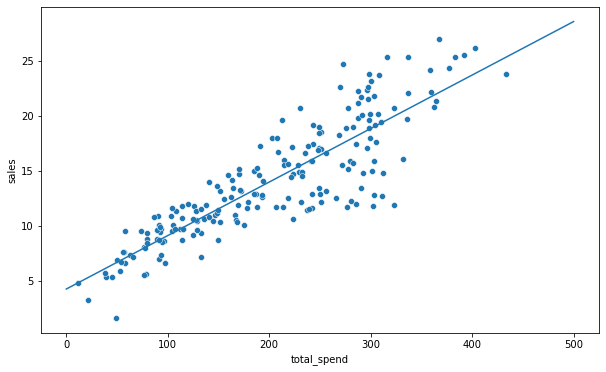

In [29]:
plt.plot(potential_spend, predicted_sales_lin)
sns.scatterplot(x='total_spend',y='sales',data=df)

## How can we improve our predictions?

In [ ]:
best line resi. toplamı sıfır oluor